In [1]:
import pandas as pd
import numpy
from matplotlib import pyplot as plt


In [3]:
df = pd.read_excel("Height-Width.xlsx")

In [4]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [5]:
x=df[['Height']]
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [6]:
y=df['Weight']
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.3,random_state=45)
xtrain.head()

,Height
2257,69.346474
276,62.600248
1418,68.697461
1550,67.396020
2510,69.326189


In [8]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(xtrain,ytrain)

LinearRegression()

In [9]:
m=reg.coef_
m

array([5.89957787])

In [10]:
c=reg.intercept_
c

-220.18715695214908

In [11]:
y=m*2510 +c
y

array([14587.75328798])

In [17]:
reg.predict([[74.11010539]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([217.03118049])

In [21]:
reg.predict(xtest)

array([179.04561662, 219.94889141, 193.79494594, ..., 172.81690626,
       196.7531826 , 194.4356857 ])

In [22]:
pred=reg.predict(xtest)
pred

array([179.04561662, 219.94889141, 193.79494594, ..., 172.81690626,
       196.7531826 , 194.4356857 ])

In [23]:
df["Predicted Result"]=reg.predict(x)

In [24]:
df.head()

,Height,Weight,Predicted Result
0,73.847017,241.893563,215.479070
1,68.781904,162.310473,185.597042
2,74.110105,212.740856,217.031180
3,71.730978,220.042470,202.995336
4,69.881796,206.349801,192.085939


In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [26]:
mse=mean_squared_error(ytest,pred)
mse

114.34471379972085

In [27]:
mae=mean_absolute_error(ytest,pred)

In [28]:
mae

8.033241997174171

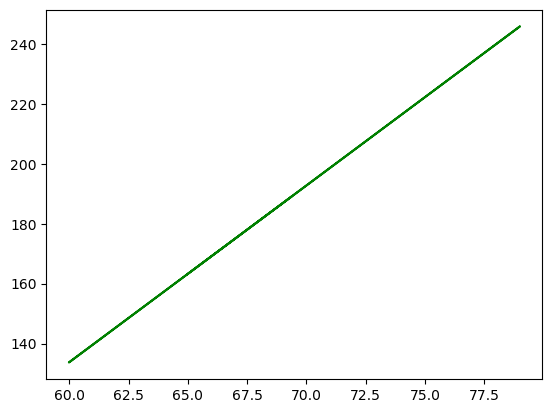

In [29]:
plt.plot(xtrain,reg.predict(xtrain),color="green")

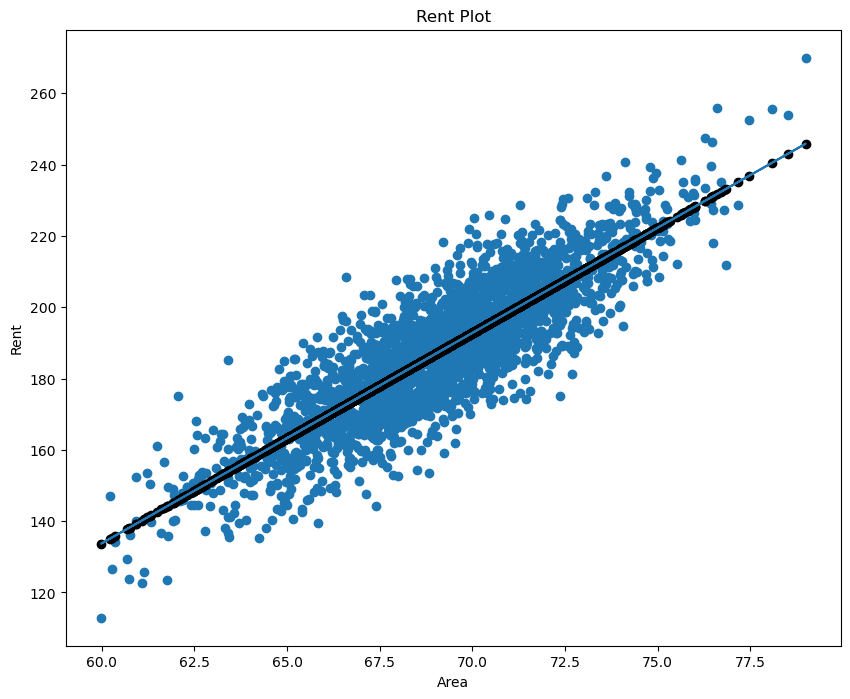

In [30]:
plt.figure(figsize=(10,8))
plt.xlabel("Area")
plt.ylabel("Rent")
plt.title("Rent Plot")
plt.scatter(xtrain,ytrain)
plt.plot(xtrain,reg.predict(xtrain))
plt.scatter(xtrain,reg.predict(xtrain),color="black")

In [31]:
from sklearn.metrics import r2_score
r2_score(ytest,pred)

0.7285757231751437

In [32]:
xtest.to_csv("xtest.csv")
xtest.head()

,Height
1971,67.671414
1750,74.604668
2564,70.171479
3114,71.954680
176,67.599424


In [33]:
import pickle as pk
import joblib as jb

In [34]:
pk.dump(reg,open("present","wb"))

In [35]:
reg2 = pk.load(open("present","rb"))

In [37]:
reg2.predict([[1000]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5679.39070955])

In [38]:
import warnings
warnings.filterwarnings("ignore")

In [39]:
jb.dump(reg, "future")

['future']